In [ ]:
# TOPIC MODELLING with WordCloud and Latent Dirichlet Allocation (LDA)

#Raul Manongdo  Nov 2022
#Given a comments input CSV file, extract topics and visualise in wordcloud and LDA model results in HTML

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
# Importing modules
import pandas as pd
import os
os.chdir('/Users/raulmanongdo/JupyterFiles/DET_DA_Assess_Task')

# Read data into comments
comments = pd.read_csv('./DET_comments.csv')
comments.head()

,Comment
0,The guy on the phone was very approachable and...
1,I got sent to 4 different teams for a simple q...
2,Sandeep was helpful and It took 3 weeks to sol...
3,The information isn't easily avaliable and the...
4,Extremely helpful and friendly and Bad policy ...


In [25]:
# Load the regular expression library
import re
# Remove punctuation
comments['Comment'] = \
comments['Comment'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
comments['Comment'] = \
comments['Comment'].map(lambda x: x.lower())

# Print out the first rows of comments
comments['Comment'].head()

0    the guy on the phone was very approachable and...
1    i got sent to 4 different teams for a simple q...
2    sandeep was helpful and it took 3 weeks to sol...
3    the information isn't easily avaliable and the...
4    extremely helpful and friendly and bad policy ...
Name: Comment, dtype: object

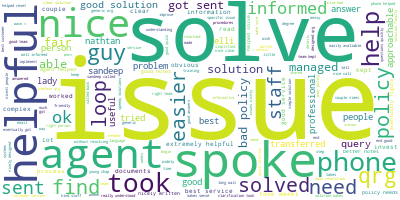

In [26]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(comments['Comment'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [27]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords',download_dir='\.', quiet=True)
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [28]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = comments.Comment.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['guy', 'phone', 'approachable', 'qrg', 'clear']


In [29]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [30]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.087*"solve" + 0.066*"took" + 0.052*"helpful" + 0.040*"issues" + '
  '0.028*"weeks" + 0.026*"solution" + 0.026*"issue" + 0.025*"agent" + '
  '0.024*"phone" + 0.024*"query"'),
 (1,
  '0.044*"good" + 0.041*"solution" + 0.041*"issue" + 0.027*"qrg" + '
  '0.026*"helpful" + 0.020*"policy" + 0.019*"easier" + 0.019*"service" + '
  '0.019*"nice" + 0.019*"spoke"'),
 (2,
  '0.044*"nice" + 0.039*"spoke" + 0.031*"good" + 0.028*"agent" + '
  '0.027*"policy" + 0.025*"solution" + 0.025*"phone" + 0.024*"clear" + '
  '0.022*"issue" + 0.021*"solve"'),
 (3,
  '0.036*"policy" + 0.036*"issue" + 0.030*"good" + 0.029*"took" + '
  '0.028*"solve" + 0.026*"spoke" + 0.025*"solution" + 0.024*"best" + '
  '0.022*"help" + 0.020*"got"'),
 (4,
  '0.032*"policy" + 0.030*"nice" + 0.025*"phone" + 0.023*"people" + '
  '0.022*"team" + 0.022*"qrg" + 0.021*"spoke" + 0.021*"solution" + '
  '0.019*"issues" + 0.019*"nicely"')]


In [31]:
import pyLDAvis.gensim
import pickle

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

In [32]:
LDAvis_data_filepath = './LDAvis_prepared'
#load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

In [33]:
pyLDAvis.save_html(LDAvis_prepared,'./ldavis_prepared.html')

from IPython.core.display import HTML 
HTML('./ldavis_prepared.html')
